
# Trabajo práctico 1
## Diferencias finitas - Ecuaciones diferenciales ordinarias (EDO)

**Entregar los problemas que se indican**


In [62]:
import numpy as np
import matplotlib.pyplot as plt

##Ejercicio 3 (entregar)


Considere el siguiente modelo de un sistema de reacciones químicas:
\begin{align}
\frac{dx}{dt} &= a - (b+1) x + x^2 y, \\
\frac{dy}{dt} &= b\,x - x^2 y,
\end{align}
donde $x$ e $y$ son las concentraciones, y $a$ y $b$ son parámetros. Resuelva numéricamente el sistema con un método RK4, y grafique las trayectorias en el espacio de fases $(x,y)$. Considere los siguientes casos.
1. Para $a=b=1$, y usando pasos $h=0.1$, $0.2$, $0.5$ y $1.0$, muestre numéricamente que las soluciones numéricas convergen al equilibrio, incluso para los pasos grandes.
2. Para $a=1$, $b=3$, muestre (numéricamente) que el equilibrio es inestable y que las trayectorias tienden a un ciclo límite. Pruebe distintas condiciones iniciales (tanto dentro del ciclo y cerca del punto fijo, como fuera de él). Use pasos $h=0.1$ y mayores, con cuidado. Verifique que a partir de cierto valor de $h$ las soluciones numéricas divergen. Los sistemas no lineales son chúcaros.




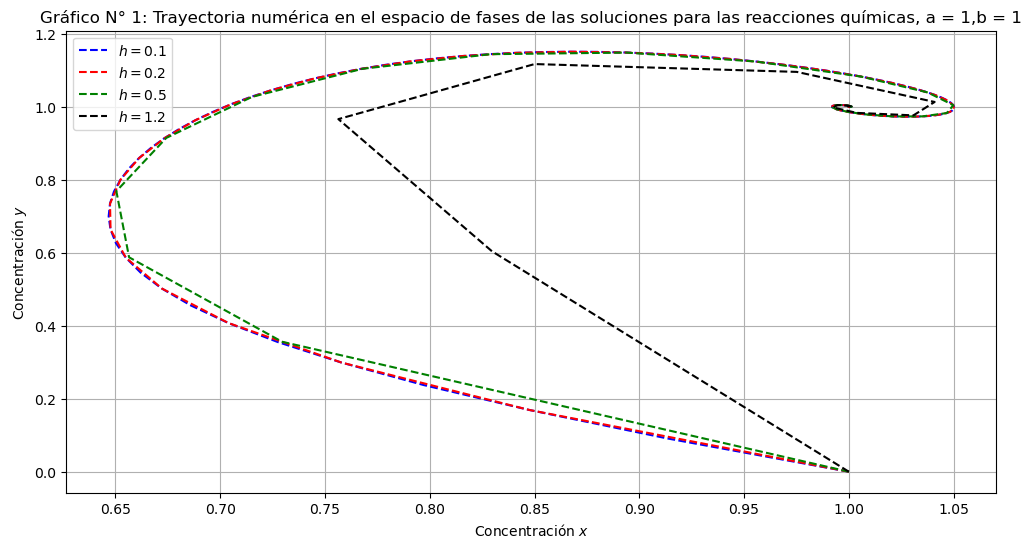

In [63]:
# Defino una función para la ecuación diferencial de las reacciones químicas

def reaccion_quimica_edo(j, t, a = 1, b = 1):
  x, y = j
  dxdt = a - ((b + 1) * x) + ((x**2) * y)
  dydt =  b*x - (x**2)*y
  return np.array([dxdt, dydt])


# Defino una función para el algoritmo RK4 usando la función "reacción química" como sistema de ec. diferenciales

def RK4(reaccion_quimica_edo, j0, t, a, b):
    j = np.zeros((len(t), len(j0))) # Matriz de (Num pasos de tiempo x Num ecuaciones)
    j[0] = j0
    h = t[1] - t[0]  # Suponemos un espaciado uniforme
    for n in range(0, len(t)-1):

      k1 = h * reaccion_quimica_edo(j= j[n], t = t[n], a = a, b = b)
      k2 = h * reaccion_quimica_edo(j = j[n] + k1/2, t = t[n] + h/2, a = a, b = b)
      k3 = h * reaccion_quimica_edo(j = j[n] + k2/2, t = t[n] + h/2, a = a, b = b)
      k4 = h * reaccion_quimica_edo(j = j[n] + k3, t = t[n] + h, a = a, b = b)

      j[n+1] = j[n] + ((1/6) * (k1 + 2*k2 + 2*k3 + k4))
    return j

j0 = np.array([1, 0])  # Condiciones iniciales
t_max = 200            # Fijo un tiempo máximo hasta el cual se resolverá el sistema de ecuaciones diferenciales



h = [0.1, 0.2, 0.5, 1.2]                      # Lista de pasos a emplear en la función RK4
color = ['blue','red','green','black']

plt.figure(figsize=(12, 6))

a, b = 1, 1                                   # Valores de los parámetros de sistema de ecuaciones
for val in range(len(h)):
  t = np.arange(0,t_max + h[val], h[val])
  y_RK4 = RK4(reaccion_quimica_edo, j0, t, a , b)
  plt.plot(y_RK4[:, 0], y_RK4[:, 1], '--',color=color[val], label = f'$h = {h[val]}$')

plt.legend()
plt.xlabel('Concentración $x$')
plt.ylabel('Concentración $y$')
plt.title('Gráfico N° 1: Trayectoria numérica en el espacio de fases de las soluciones para las reacciones químicas, a = 1,b = 1')
plt.grid(True)
plt.show()

# Planteamientos y Respuestas:

1. Para $a=b=1$, y usando pasos $h=0.1$, $0.2$, $0.5$ y $1.0$, muestre numéricamente que las soluciones numéricas convergen al equilibrio, incluso para los pasos grandes

2. Para $a=1$, $b=3$, muestre (numéricamente) que el equilibrio es inestable y que las trayectorias tienden a un ciclo límite. Pruebe distintas condiciones iniciales (tanto dentro del ciclo y cerca del punto fijo, como fuera de él). Use pasos $h=0.1$ y mayores, con cuidado. Verifique que a partir de cierto valor de $h$ las soluciones numéricas divergen.

R. Bajo las condiciones a = 1, b = 1, las soluciones del sistema de ecuaciones diferenciales tienden a evolucionar en el tiempo a un punto de equilibrio estable, sin importar que el valor de h sea grande, como se observa en el Gráfico N° 1. Aunque las trayectorias al punto de equilibrio estable difieren, se observa que convergen al valor x = 1, y = 1.


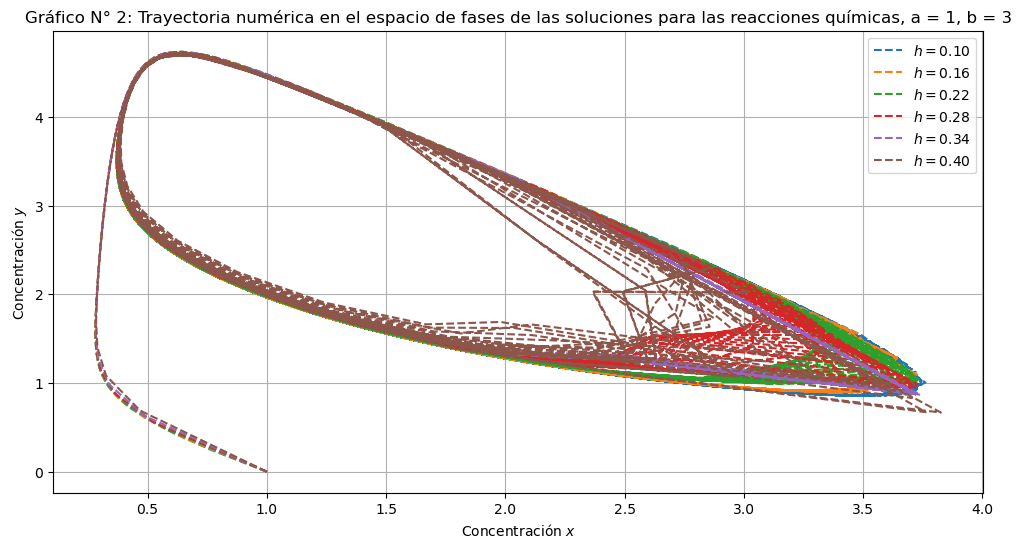

In [64]:
a, b = 1, 3                                   # Valores de los parámetros del sistema de ecuaciones
h = np.linspace(0.1,0.4,6)

plt.figure(figsize=(12, 6))

for val in range(len(h)):
  t = np.arange(0,t_max + h[val], h[val])
  y_RK4 = RK4(reaccion_quimica_edo, j0, t, a , b)
  plt.plot(y_RK4[:, 0], y_RK4[:, 1],'--', label = f'$h = {h[val]:.2f}$')


plt.legend()
plt.xlabel('Concentración $x$')
plt.ylabel('Concentración $y$')
plt.title('Gráfico N° 2: Trayectoria numérica en el espacio de fases de las soluciones para las reacciones químicas, a = 1, b = 3')
plt.grid(True)
plt.show()

R. En el Gráfico N° 2 se puede observar que al imponer las condiciones a = 1, b = 3, sin importar el valor del paso h, las trayectorias no convergen hacia un único punto en el espacio de fases. Además, a partir de valores de h tan grandes como 0.28, las trayectorias en el espacio de fases tienden a presentar anomalías.

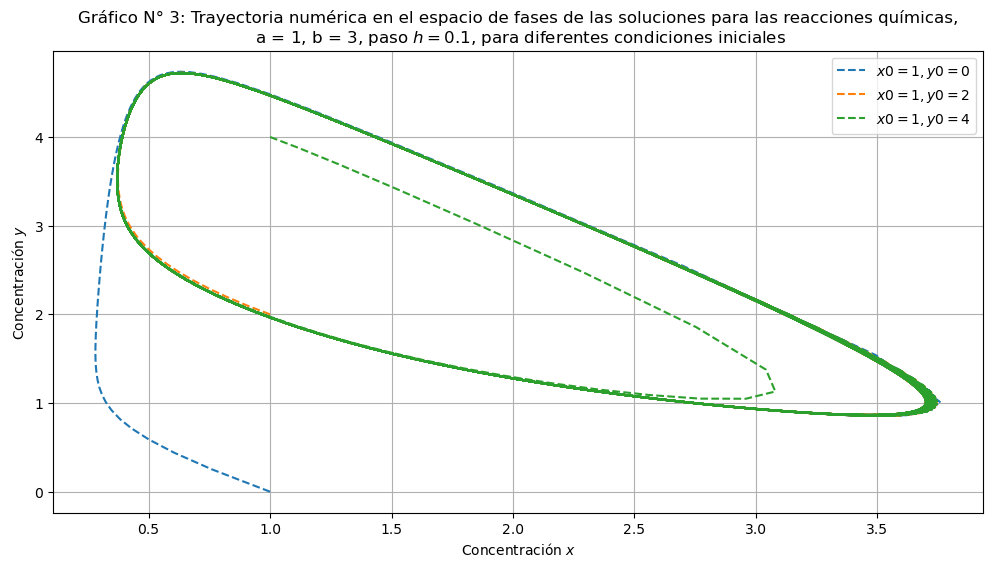

In [65]:
j0_array = np.array([[1,0],[1,2],[1,4]])         # Valores de tres condiciones iniciales para el sistema de ecuaciones diferenciales
paso_fijo = 0.1                                  # Paso h único (h = 0.1)
t = np.arange(0,t_max + paso_fijo, paso_fijo)
plt.figure(figsize=(12, 6))

for cond in range(len(j0_array)):
  y_RK4 = RK4(reaccion_quimica_edo, j0_array[cond], t, a , b)
  plt.plot(y_RK4[:, 0], y_RK4[:, 1], '--', label = f'$x0 = {j0_array[cond][0]}, y0 = {j0_array[cond][1]}$')


plt.legend()
plt.xlabel('Concentración $x$')
plt.ylabel('Concentración $y$')
plt.title(f'Gráfico N° 3: Trayectoria numérica en el espacio de fases de las soluciones para las reacciones químicas,\n a = 1, b = 3, paso $h= {paso_fijo}$, para diferentes condiciones iniciales')
plt.grid(True)
plt.show()

R. En el Gráfico N° 3 se corrobora que el hecho de que para valores de los parámetros a y b iguales a 1 y 3 respectivamente, si se resuelve el sistema de ecuaciones con un paso lo suficientemente pequeño, h = 0.1, sin importar el punto inicial en el espacio de fases (fuera del ciclo límite, sobre el ciclo límite o en la región interior del mismo), la trayectoria evolucionará hacia una curva cíclica en el espacio de fases.

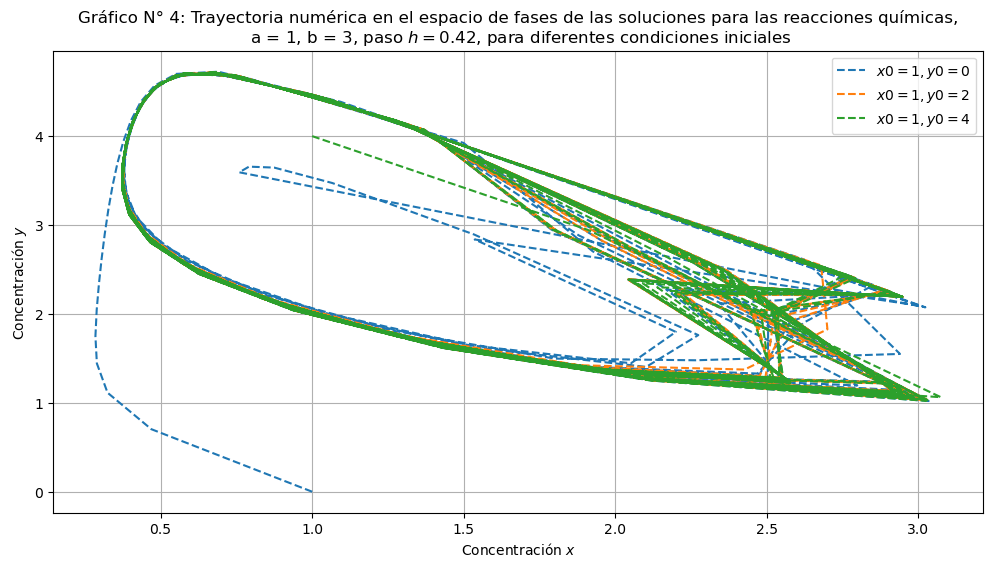

In [66]:
paso_fijo = 0.42                                      # Paso h único (h = 0.42)
t = np.arange(0,t_max + paso_fijo, paso_fijo)
plt.figure(figsize=(12, 6))

for cond in range(len(j0_array)):
  y_RK4 = RK4(reaccion_quimica_edo, j0_array[cond], t, a , b)
  plt.plot(y_RK4[:, 0], y_RK4[:, 1], '--', label = f'$x0 = {j0_array[cond][0]}, y0 = {j0_array[cond][1]}$')


plt.legend()
plt.xlabel('Concentración $x$')
plt.ylabel('Concentración $y$')
plt.title(f'Gráfico N° 4: Trayectoria numérica en el espacio de fases de las soluciones para las reacciones químicas,\n a = 1, b = 3, paso $h= {paso_fijo}$, para diferentes condiciones iniciales')
plt.grid(True)
plt.show()

Al igual que lo observado en el Gráfico N° 3, en el Gráfico N° 4 se aprecia que la evolución del conjunto de reacciones químicas descritos por las ecuaciones diferenciales evolucionará hacia un ciclo límite, sin embargo, si el valor del paso empleado es muy grande, las soluciones divergeran del ciclo límite dependiendo del punto inicial.

##Ejercicio 4 (entregar)

Modifique el programa del problema anterior para que use un paso adaptativo. Es decir, sea $y_1$ la solución usando paso $h$ e $y_2$ usando $h/2$. Considere su diferencia:
$$
\Delta = |y_2 - y_1|,
$$
y una tolerancia $\epsilon = 10^{-5}$. Programe la siguiente estrategia para ajustar el paso $h$:
* Si $\Delta < \epsilon/2$: acepto $y_2$ y multiplico el paso por 1.5.
* Si $\epsilon/2 < \Delta < \epsilon$: acepto $y_2$ y mantengo el paso.
* Si $\epsilon < \Delta$: rechazo $y_2$, divido el paso por 1.5 y vuelvo a calcular.  

Para $a=1$, $b=3$, grafique las soluciones numéricas $x(t)$ e $y(t)$ y la trayectoria en el espacio de fases, señalando cómo se adapta el paso en los regímenes de variación rápida del oscilador.

Contando la cantidad de pasos en un ciclo, estime la ventaja del algoritmo con respecto a un RK4 de paso fijo con la misma precisión (necesitará un $h\approx 0.01$).

Considere una tolerancia distinta ($\epsilon=10^{-2}$, por ejemplo) y discuta las diferencias.


Si tiene ganas, considere también otros valores del factor de multiplicación del paso (en muchos libros recomiendan el valor 2 en lugar de 1.5, por ejemplo). ¿Qué ocurre con la discretización del tiempo?





In [67]:
# Defino una función para un sólo paso del algoritmo RK4:

def aux_RK4(reaccion_quimica_edo, j0, h , t, a, b):
      k1 = h * reaccion_quimica_edo(j0, t = t, a = a, b = b)
      k2 = h * reaccion_quimica_edo(j0 + k1/2, t = t + h/2, a = a, b = b)
      k3 = h * reaccion_quimica_edo(j0 + k2/2, t = t + h/2, a = a, b = b)
      k4 = h * reaccion_quimica_edo(j0 + k3, t = t + h, a = a, b = b)

      y = j0 + ((1/6) * (k1 + 2*k2 + 2*k3 + k4))
      return y


# Defino una función para el algoritmo RK4 de paso adaptativo:

def RK4_adaptativo(reaccion_quimica_edo, j0, a, b,t_lim, tol):

    j = []
    lapsos = []
    pasos = []
    j.append(j0.tolist())
    n = 1
    t = 0
    lapsos.append(t)
    h = 0.01
    pasos.append(h)

    while t <= t_lim:
      #t += h

      h2 = h/2

      y1 = aux_RK4(reaccion_quimica_edo,j[n -1],h,t = t,a = a, b = b)
      y_inter = aux_RK4(reaccion_quimica_edo,j[n - 1],h2,t = t,a = a, b = b)
      y2 = aux_RK4(reaccion_quimica_edo,y_inter,h2,t = t + h2,a = a, b = b)

      delta =  np.linalg.norm(y2 - y1)
      if delta < tol/2:

        j.append(y2.tolist())
        pasos.append(h)
        n += 1
        t += h
        lapsos.append(t)

        h = h*1.5

      elif ((delta > tol/2) and (delta < tol)):

        j.append(y2.tolist())
        pasos.append(h)
        n += 1
        t += h
        lapsos.append(t)

      elif delta > tol:

        h = h/1.5


    return (np.array(j),lapsos,pasos)  # La función retorna tres estructuras: un array de vectores solución del sistema de EDO, una lista
                                       # con los los valores de tiempo y una lista con los valores de paso h en casa instante de tiempo.


a, b = 1, 3                            # Valores de los parámetros del sistema de EDO




In [75]:
paso_RK4 = 0.01                                 # Paso único para el algoritmo RK no adaptativo
t_RK4_ = np.arange(0,10 + paso_RK4, paso_RK4)
y_adap_10_s =  RK4_adaptativo(reaccion_quimica_edo, np.array([1,0]),a,b,t_lim=10, tol = 1e-5)
y_RK4_10_s = RK4(reaccion_quimica_edo, np.array([1,0]), t_RK4_, a , b)

pasos_RK4 = len(t_RK4_)
pasos_adap = len(y_adap_10_s[2])

print(f'Cantidad de pasos usando el método Runge-Kuta en un ciclo de 10 s,(h = 0.01) = {pasos_RK4}')
print(f'Cantidad de pasos usando el método Runge-Kuta de paso adaptativo en un ciclo de 10 s = {pasos_adap}')


Cantidad de pasos usando el método Runge-Kuta en un ciclo de 10 s,(h = 0.01) = 1001
Cantidad de pasos usando el método Runge-Kuta de paso adaptativo en un ciclo de 10 s = 80


Al comparar el algoritmo Runge Kuta de paso adaptativo con respecto al de paso constante, puede corroborarse numéricamente que la cantidad de pasos requeridos para un tiempo t fijo por la versión del algoritmo RK de paso adapatativo es mucho menor a su versión de paso constante. En este caso, para un tiempo t = 10 s, se encontró que el algoritmo RK de paso fijo, empleó 1001 puntos en un ciclo, en cambio el algoritmo RK adaptativo empleó 50 puntos, siendo así mucho más eficiente.

In [ ]:
from time import time

start = time()
y_adap_tol_e_2 = RK4_adaptativo(reaccion_quimica_edo, np.array([1,0]),a,b,t_lim=200, tol=10**-2)
end = time()
print(f'tiempo de ejecución del método adaptativo para un tiempo total de 100 s y tolerancia 10**-2: {(end  - start):.4f} s')

tiempo de ejecución del método adaptativo para un tiempo total de 100 s y tolerancia 10**-2: 0.1040 s


In [ ]:
start = time()
y_adap_tol_e_5 = RK4_adaptativo(reaccion_quimica_edo, np.array([1,0]),a,b,t_lim=200, tol=10**-5)
end = time()
print(f'tiempo de ejecución del método adaptativo para un tiempo total de 100 s y tolerancia 10**-5: {(end  - start):.4f} s')

tiempo de ejecución del método adaptativo para un tiempo total de 100 s y tolerancia 10**-5: 0.3050 s


Una de las diferencias encontradas al variar la tolerancia en el algoritmo RK adaptativo de 10^-5 a 10^-2, se encuentra en el tiempo de cómputo para un tiempo t dado, por ejemplo, para t = 10 s, empleando una tolerancia de 10^-2 al algoritmo le tomó aproximadamente 0.07 s realizar las iteraciones y encontrar las soluciones, en cambio al disminuir la tolerancia en dos ordenes de magnitud, el tiempo de cómputo fué de aproximadamente 0.3 s. Es decir, a menor tolerancia el criterio de selección de h es más restrictivo y procura una mayor cantidad de iteraciones.

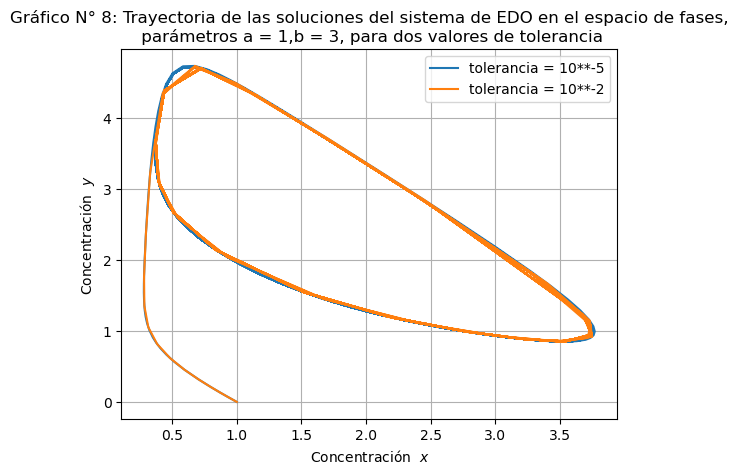

In [ ]:
plt.plot(y_adap_tol_e_5[0][:,0], y_adap_tol_e_5[0][:,1], label = "tolerancia = 10**-5")
plt.plot(y_adap_tol_e_2[0][:,0], y_adap_tol_e_2[0][:,1], label = "tolerancia = 10**-2")

plt.legend()
plt.xlabel('Concentración  $x$')
plt.ylabel('Concentración  $y$')
plt.title(f'Gráfico N° 8: Trayectoria de las soluciones del sistema de EDO en el espacio de fases,\n parámetros a = 1,b = 3, para dos valores de tolerancia')
plt.grid(True)
plt.show()

En el Gráfico N° 8, se visualiza que, como consecuencia de la menor cantidad de pasos de iteración obtenidos al aumentar la tolerancia de 10^-5 a 10^-2, la trayectoria descrita en el espacio de fases por las soluciones sea menor precisa en aquellos puntos donde la variación de las concentraciones es más pronunciada, como lo es el punto 0.5,4.5 por ejemplo.

In [ ]:
print(f'Cantidad de pasos usando el método Runge-Kuta de paso adaptativo en un ciclo de 200 s, tolerancia 10**-2 = {len(y_adap_tol_e_2[1])}')
print(f'Cantidad de pasos usando el método Runge-Kuta de paso adaptativo en un ciclo de 200 s, tolerancia 10**-5 = {len(y_adap_tol_e_5[1])}')

Cantidad de pasos usando el método Runge-Kuta de paso adaptativo en un ciclo de 200 s, tolerancia 10**-2 = 465
Cantidad de pasos usando el método Runge-Kuta de paso adaptativo en un ciclo de 200 s, tolerancia 10**-5 = 1617


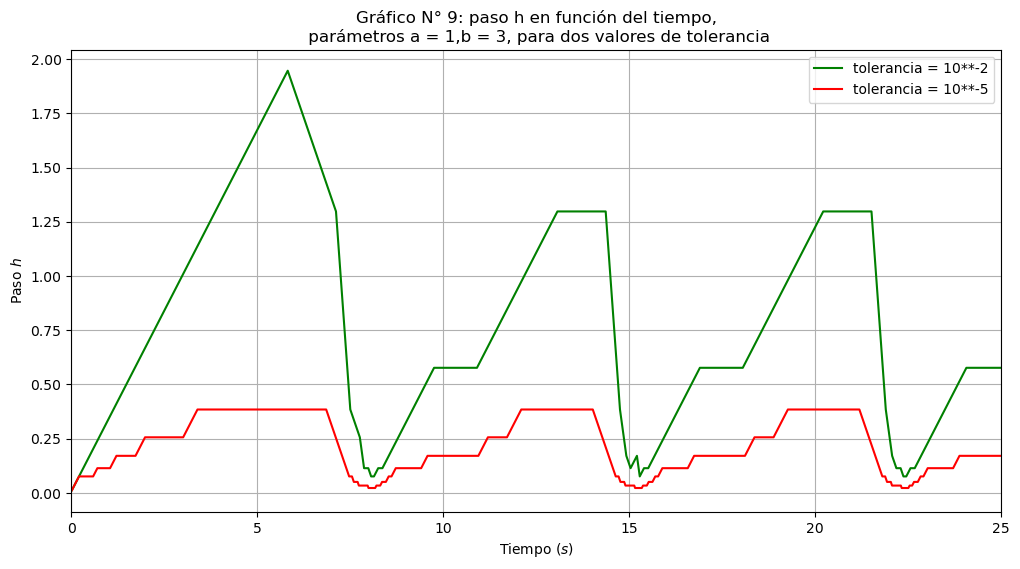

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(y_adap_tol_e_2[1], y_adap_tol_e_2[2], label = "tolerancia = 10**-2",color = "green")
plt.plot(y_adap_tol_e_5[1], y_adap_tol_e_5[2], label = "tolerancia = 10**-5",color = "red")

plt.legend()
plt.xlabel('Tiempo $(s)$')
plt.ylabel('Paso $h$')
plt.xlim([0,25])
plt.title(f'Gráfico N° 9: paso h en función del tiempo,\n parámetros a = 1,b = 3, para dos valores de tolerancia')
plt.grid(True)
plt.show()

Corroborando lo mencionado en otro apartado, en el Gráfico N° 9 se observa que emplear una tolerancia mayor (10^-2), hace que el paso sea más grande en términos generales y que la cantidad de variaciones del mismo sea menor que la que se aprecia para una tolerancia más reducida.
